In [23]:
import numpy as np
import oxpy
import time

Ns = (100, 250, 500, 1000)
list_types = ("no", "verlet", "cells")

benchmarks = {}
for list_type in list_types:
    benchmarks[list_type] = []
    for N in Ns:
        with oxpy.Context(print_coda=False):
            my_input = oxpy.InputFile()
            my_input.init_from_filename("../files/input")
            my_input["topology"] = f"../files/topology_{N}.dat"
            my_input["conf_file"] = f"../files/init_conf_{N}.dat"
            my_input["lastconf_file"] = f"../files/init_conf_{N}.dat"
            my_input["list_type"] = list_type
    
            manager = oxpy.OxpyManager(my_input)

            t = time.process_time_ns()
            manager.run(10000)
            t = (time.process_time_ns() - t) / 1000

            benchmarks[list_type].append(t)

            manager.print_configuration()
    
            del manager

Text(0, 0.5, 'Walltime')

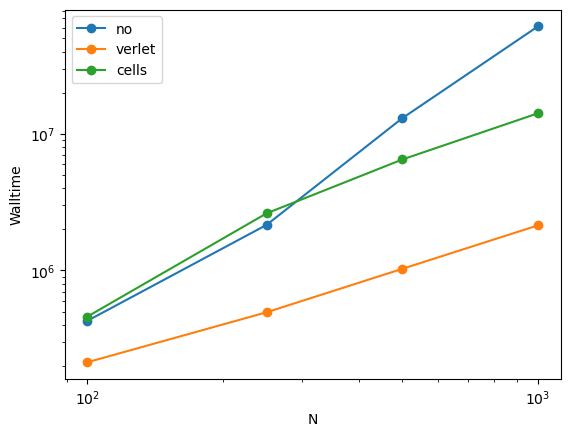

In [26]:
import matplotlib.pyplot as plt

for list_type in list_types:
    plt.plot(Ns, benchmarks[list_type], 'o-', label=list_type)
    np.savetxt(f"../files/benchmark_oxDNA_{list_type}.dat", np.c_[Ns, benchmarks[list_type]])
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.xlabel("N")
plt.ylabel("Walltime")